# Árboles de decisión

Vamos a trabajar sobre el dataset de helados (promesa: es la última vez), para poder ir comparando este clasificador con lo que hacían otros. 

In [4]:
import pandas as pd
helados = pd.read_csv('Ice_cream.csv')
helados.head()

,Unnamed: 0,id,female,ice_cream,video,puzzle
0,0,70,0,0,47,57
1,1,121,1,1,63,61
2,2,86,0,0,58,31
3,3,141,0,0,53,56
4,4,172,0,1,53,61


Lo primero es crear un árbol, lo hacemos con sklearn y lo fiteamos, primero usando solo _video_ y _puzzle_ para graficar y comparar. 

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(helados[["video","puzzle"]],helados["ice_cream"])


DecisionTreeClassifier()

/Users/juan/downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


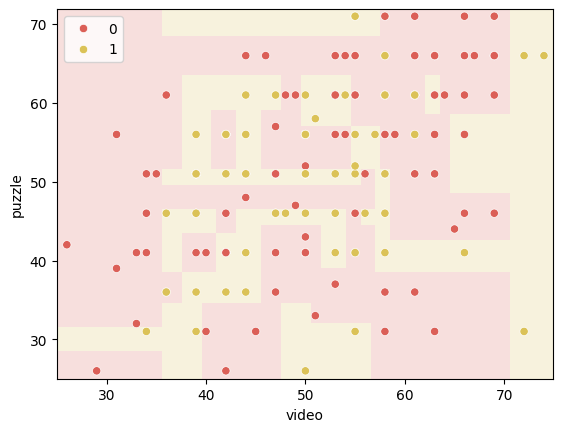

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

palette = sns.color_palette("hls", 8)
# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:2])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = helados.video.min() - 1, helados.video.max() + 1
y_min, y_max = helados.puzzle.min() - 1, helados.puzzle.max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Generamos las predicciones
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('video')
plt.ylabel('puzzle')

sns.scatterplot(data=helados, x="video", y="puzzle", hue="ice_cream", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Cuál es al accuracy de la predicción:

In [8]:
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(helados[["female","video","puzzle"]],helados["ice_cream"])

pred = clf.predict(helados[["female","video","puzzle"]])
accuracy_score(helados['ice_cream'], pred )


0.87

Esto no es malo, pero recuerden que estamos midiendo con el mismo dataset. ¿Qué pasa si medimos ahora el accuracy con una división de train/test de 75% - 25%? ¡Vemos que nuestro clasificador es peor que tirar una moneda! 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(helados[["female","puzzle","video"]], helados["ice_cream"], test_size=0.25, random_state=42)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred )

0.48

Esto lo vemos también haciendo cross validation. 

In [3]:
from sklearn.model_selection import cross_val_score

clf_pvf = tree.DecisionTreeClassifier()
clf_pvf.fit(helados[['female','video','puzzle']], helados['ice_cream'])

print(cross_val_score(clf_pvf, helados[['female','video','puzzle']], helados['ice_cream'], cv=3, scoring='accuracy'))


[0.58208955 0.53731343 0.40909091]


**Probabilidad de pertenecer a una clase**. Sklearn provee de un método que determina la probabilidad de pertenecer a una clase. Mira esté método, y mira como se compara con las predicciones abajo. ¿Qué hace el árbol cuando la probabilidad es 50-50?

In [9]:
clf_proba = tree.DecisionTreeClassifier()
clf_proba.fit(X_train,y_train)

pred_proba = clf.predict_proba(X_test)
pred_proba

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.

In [10]:
for i in range(0,len(pred)):
    print(pred[i])
    print(pred_proba[i])

1
[0. 1.]
0
[1. 0.]
1
[0. 1.]
0
[0.5 0.5]
1
[0. 1.]
0
[0.5 0.5]
0
[1. 0.]
0
[0.5 0.5]
0
[1. 0.]
0
[1. 0.]
1
[0. 1.]
1
[0. 1.]
1
[0. 1.]
0
[1. 0.]
0
[0.66666667 0.33333333]
1
[0. 1.]
1
[0. 1.]
0
[0.66666667 0.33333333]
0
[0.5 0.5]
0
[1. 0.]
0
[1. 0.]
0
[1. 0.]
0
[1. 0.]
0
[0.5 0.5]
0
[1. 0.]
0
[1. 0.]
0
[1. 0.]
1
[0. 1.]
1
[0. 1.]
0
[0.66666667 0.33333333]
1
[0. 1.]
1
[0. 1.]
0
[1. 0.]
0
[1. 0.]
0
[0.5 0.5]
0
[1. 0.]
0
[1. 0.]
1
[0. 1.]
0
[1. 0.]
0
[1. 0.]
0
[1. 0.]
0
[1. 0.]
1
[0. 1.]
0
[1. 0.]
1
[0. 1.]
1
[0. 1.]
1
[0. 1.]
1
[0. 1.]
0
[0.5 0.5]
0
[1. 0.]


Lo último que mostramos es sobre imprimir el árbol, primero en texto y después en imágenes. 

[Text(135.69936179577465, 211.7178947368421, 'X[1] <= 35.5\ngini = 0.499\nsamples = 200\nvalue = [105, 95]'),
 Text(63.65915492957746, 200.2736842105263, 'X[2] <= 31.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(58.943661971830984, 188.82947368421054, 'X[2] <= 28.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(54.22816901408451, 177.38526315789474, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(63.65915492957746, 177.38526315789474, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(68.37464788732395, 188.82947368421054, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(207.73956866197182, 200.2736842105263, 'X[1] <= 58.5\ngini = 0.5\nsamples = 188\nvalue = [94, 94]'),
 Text(144.33829225352113, 188.82947368421054, 'X[0] <= 0.5\ngini = 0.493\nsamples = 140\nvalue = [62, 78]'),
 Text(73.09014084507042, 177.38526315789474, 'X[2] <= 53.5\ngini = 0.474\nsamples = 57\nvalue = [22, 35]'),
 Text(49.51267605633803, 165.94105263157894, 'X[2] <= 49.0\ngini = 0.401\nsamples = 36\

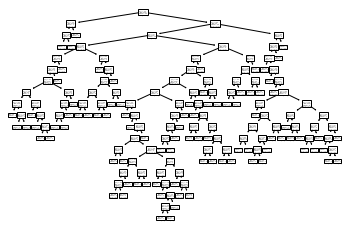

In [7]:

tree.plot_tree(clf_pvf) 


### Random Forest

Y podremos mejorar esto con un clasificador más complejo?

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = rf.fit(X_train,y_train)

In [15]:
pred = rf.predict(X_test)
accuracy_score(y_test, pred )

0.46

**IMPORTANTE**: en la gran mayoría de las veces, Random Forest y otros ensamblajes tienen un comportamiento mucho mejor, y por tanto son más usados en la práctica. Recordar que este dataset es especialmente malo. 